In [1]:
#Importar paquetes de herramientas:
#Datos
import pandas as pd
import numpy as np
import re
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
# Importamos librerias de PCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score , rand_score
import sklearn.metrics as metrics


### Dataset

In [3]:
#Importamos los 12 datasets de cada uno de los meses del año 2020
robos_df_ene = pd.read_excel('dnrpa-robos-recuperos-autos-202001.xlsx') #df = Data Frame
robos_df_feb = pd.read_excel('dnrpa-robos-recuperos-autos-202002.xlsx') #df = Data Frame
robos_df_mar = pd.read_excel('dnrpa-robos-recuperos-autos-202003.xlsx') #df = Data Frame
robos_df_abr = pd.read_excel('dnrpa-robos-recuperos-autos-202004.xlsx') #df = Data Frame
robos_df_may = pd.read_excel('dnrpa-robos-recuperos-autos-202005.xlsx') #df = Data Frame
robos_df_jun = pd.read_excel('dnrpa-robos-recuperos-autos-202006.xlsx') #df = Data Frame
robos_df_jul = pd.read_excel('dnrpa-robos-recuperos-autos-202007.xlsx') #df = Data Frame
robos_df_ago = pd.read_excel('dnrpa-robos-recuperos-autos-202008.xlsx') #df = Data Frame
robos_df_sep = pd.read_excel('dnrpa-robos-recuperos-autos-202009.xlsx') #df = Data Frame
robos_df_oct = pd.read_excel('dnrpa-robos-recuperos-autos-202010.xlsx') #df = Data Frame
robos_df_nov = pd.read_excel('dnrpa-robos-recuperos-autos-202011.xlsx') #df = Data Frame
robos_df_dic = pd.read_excel('dnrpa-robos-recuperos-autos-202012.xlsx') #df = Data Frame

In [4]:
#Concatenamos los 12 datasets en un unico data set
robos_df_total = pd.concat([robos_df_ene, robos_df_feb,robos_df_mar,robos_df_abr,robos_df_may,robos_df_jun,robos_df_jul,robos_df_ago,
                           robos_df_sep,robos_df_oct,robos_df_nov,robos_df_dic], ignore_index = True)

### Pre procesamiento: 

In [5]:
#Visualizamos la cantidad de columnas y filas que tiene nuestro dataset
filas = np.shape(robos_df_total)[0] 
print(f'Filas: {filas}')

columnas = np.shape(robos_df_total)[1]
print(f'Columnas: {columnas}\r\n')
#Imprimimos un head de 5 registros de nuestro dataset
print('Output de ".head(5)": ')
robos_df_total.head(5) 

Filas: 24546
Columnas: 25

Output de ".head(5)": 


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2000-11-01,1077,QUILMES Nº 1,Buenos Aires,Nacional,2000.0,17.0,SEDAN 5 PUERTAS,...,Privado,Física,BERNAL,BUENOS AIRES,Masculino,1986.0,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2019-04-16,1244,LA MATANZA Nº 11,Buenos Aires,Protocolo 21,2019.0,4.0,RURAL 5 PUERTAS,...,Privado,Física,RAMOS MEJÍA,BUENOS AIRES,Femenino,1959.0,ARGENTINA,100,6,ARG
2,COMUNICACIÓN DE RECUPERO,2020-01-16,2006-05-10,1043,LA PLATA Nº 01,Buenos Aires,Nacional,2006.0,NaN,FGON.VID.C/ASIENTOS,...,Privado,Jurídica,LA PLATA,BUENOS AIRES,No aplica,2000.0,No aplica,100,6,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2016-01-12,1236,OLIVOS Nº 09,Buenos Aires,Nacional,2016.0,20.0,PICK-UP,...,Privado,Física,FLORIDA-VTE. LOPEZ,BUENOS AIRES,Masculino,1980.0,ARGENTINA,100,6,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-24,2019-08-12,1161,ESTEBAN ECHEVERRIA Nº 2,Buenos Aires,Protocolo 21,2019.0,5.0,SEDAN 5 PUERTAS,...,Privado,Física,CANNING,BUENOS AIRES,No identificado,1983.0,ARGENTINA,100,6,ARG


In [8]:
#visualizamos si nuestras columnas tienen valores nulos o no.
col_nulls =robos_df_total.isnull().any()
print(col_nulls, '\r\n')

tramite_tipo                       True
tramite_fecha                     False
fecha_inscripcion_inicial         False
registro_seccional_codigo         False
registro_seccional_descripcion    False
registro_seccional_provincia      False
automotor_origen                  False
automotor_anio_modelo              True
automotor_tipo_codigo              True
automotor_tipo_descripcion        False
automotor_marca_codigo             True
automotor_marca_descripcion        True
automotor_modelo_codigo            True
automotor_modelo_descripcion       True
automotor_uso_codigo              False
automotor_uso_descripcion         False
titular_tipo_persona              False
titular_domicilio_localidad        True
titular_domicilio_provincia       False
titular_genero                    False
titular_anio_nacimiento            True
titular_pais_nacimiento           False
titular_porcentaje_titularidad    False
titular_domicilio_provincia_id    False
titular_pais_nacimiento_id         True


In [9]:
#Visualizamos la cantidad de valores nulos en las primeras 6 columnas
total = robos_df_total.isnull().sum().sort_values(ascending=False)
percent = (robos_df_total.isnull().sum()/robos_df_total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
titular_pais_nacimiento_id,1530,0.062332
automotor_tipo_codigo,891,0.036299
automotor_modelo_codigo,429,0.017477
automotor_marca_codigo,391,0.015929
automotor_anio_modelo,61,0.002485
titular_domicilio_localidad,31,0.001263


In [10]:
#Eliminamos las columnas que no son necesarias para el análisis
robos_df_total.drop(["automotor_uso_codigo","titular_pais_nacimiento_id","titular_porcentaje_titularidad","titular_pais_nacimiento","automotor_uso_descripcion","titular_tipo_persona"], axis=1,inplace=True)


In [11]:
#Limpiamos todos los registros con valores nulos
robos_df_total.dropna(how ='any', inplace = True)

In [12]:
# Verificamos como quedo el data-set
print(f'Nos quedamos con un df de {robos_df_total.shape[0]} filas x{robos_df_total.shape[1]} columnas')
robos_df_total.shape

Nos quedamos con un df de 23446 filas x19 columnas


(23446, 19)

In [13]:
#Unificamos los datos para tener mediciones por mes
robos_df_total.tramite_fecha = pd.to_datetime(robos_df_total.tramite_fecha) #### indicar que columna queremos transformar #####
#Agregamos la columna de MES
robos_df_total['mes'] = robos_df_total.tramite_fecha.dt.month #creamos una nueva columna "year" con .dt.year sobre la col "indice_tiempo"
robos_df_total.head(-5)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_domicilio_provincia_id,mes
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2000-11-01,1077,QUILMES Nº 1,Buenos Aires,Nacional,2000.0,17.0,SEDAN 5 PUERTAS,19,FORD,JD,ESCORT LX 1.8 5P D,BERNAL,BUENOS AIRES,Masculino,1986.0,6,1
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2019-04-16,1244,LA MATANZA Nº 11,Buenos Aires,Protocolo 21,2019.0,4.0,RURAL 5 PUERTAS,112,RENAULT,A61,CAPTUR INTENS 2.0,RAMOS MEJÍA,BUENOS AIRES,Femenino,1959.0,6,1
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2016-01-12,1236,OLIVOS Nº 09,Buenos Aires,Nacional,2016.0,20.0,PICK-UP,29,MERCEDES BENZ,DT,SPRINTER 415 CDI-CH 3665,FLORIDA-VTE. LOPEZ,BUENOS AIRES,Masculino,1980.0,6,1
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-24,2019-08-12,1161,ESTEBAN ECHEVERRIA Nº 2,Buenos Aires,Protocolo 21,2019.0,5.0,SEDAN 5 PUERTAS,104,PEUGEOT,861,208 ALLURE 1.6 115,CANNING,BUENOS AIRES,No identificado,1983.0,6,1
5,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-23,2011-08-02,1237,LOMAS DE ZAMORA Nº 7,Buenos Aires,Nacional,2011.0,90.0,MINIBUS,29,MERCEDES BENZ,AZ,SPRINTER 313 CDI/C 3550,LOMAS DE ZAMORA,BUENOS AIRES,Masculino,1962.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24536,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-11,1999-04-19,21075,SAN LORENZO Nº 4,Santa Fe,Nacional,1999.0,17.0,SEDAN 5 PTAS,37,RENAULT,BW,MEGANE RT,CAPITAN BERMUDEZ,SANTA FE,Masculino,1966.0,82,12
24537,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-29,2005-02-24,21075,SAN LORENZO Nº 4,Santa Fe,Protocolo 21,2005.0,2.0,SEDAN 4 PTAS,44,FIAT,557,SIENA EX TD,CAPITAN BERMUDEZ,SANTA FE,Masculino,1980.0,82,12
24538,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-29,1998-09-28,22002,FRIAS,Santiago del Estero,Protocolo 21,1998.0,5.0,SEDAN 5 PTAS,136,VOLKSWAGEN,202,GOL GL 1.6 MI,FRIAS,SGO.DEL ESTERO,No identificado,1982.0,86,12
24539,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-29,2007-06-19,22002,FRIAS,Santiago del Estero,Nacional,2007.0,12.0,SEDAN 4 PTAS,37,RENAULT,SF,CLIO TRIC PACK 1.5 DIE DA AA/2007,FRIAS,SGO.DEL ESTERO,Masculino,1986.0,86,12


In [14]:
# Guardamos en una variable la cantidad de marcas
q_marcas = len(robos_df_total['automotor_marca_descripcion'].unique())
print(f'En total hay {q_marcas} marcas\r\n')
# Mostramos en la cell los tipos de marcas existentes
print("\n", robos_df_total['automotor_marca_descripcion'].unique())

En total hay 119 marcas


 ['FORD' 'RENAULT' 'MERCEDES BENZ' 'PEUGEOT' 'CHEVROLET' 'VOLKSWAGEN'
 'FIAT' 'LIFAN' 'DFSK' 'CITROEN' 'NISSAN' 'IVECO' 'HELVETICA' 'TOYOTA'
 'CHERY' 'HONDA' 'AUDI' 'MITSUBISHI' 'KIA' 'ALFA ROMEO' 'SCANIA' 'BMW'
 'PETINARI' 'A.F.F.' 'DODGE' 'HYUNDAI' 'SEAT' 'SUZUKI' 'CHRYSLER'
 'CITROËN' 'JEEP' 'M. BENZ' 'MINI' 'PATRONELLI' 'OMBU' 'ISUZU' 'DAEWOO'
 'VOLVO' 'GALLOPER' 'SSANGYONG' 'DIMEX' 'SALTO' 'OPEL' 'AGRALE'
 'H.C. MANCINI' 'DS' 'TATA' 'ROVER' 'RENUALT' '.TOYOTA'
 'SIN ESPECIFICACION' 'FORD FALCON' 'MANQUE' 'SUBARU' 'MERCEDES-BENZ'
 'GOLONDRINA' 'MAZDA' 'PORSCHE' 'AST-PRA' 'SEVEL' 'FOTON' 'LAND ROVER'
 'SSANYONG' 'MONTENEGRO' 'BONANO' 'RAMBLER IKA' 'GMC' 'VOLKWAGEN' 'RUTERA'
 'DAIHATSU' 'INTEGRAL' 'FARGO' 'JAC' 'ARO' 'HERMANN' 'RANDON' 'EL FIERRO'
 'LAMBERT' 'FRUEHAUF' 'SOLA Y BRUSA' 'POLARIS' 'DAEWO' '3PEUGEOT' 'SAAB'
 'RAM' 'RIMEK' 'FACCHINI' 'NIÑO JESUS DE PRAGA' 'SAMSUNG' 'INNOCENTI'
 'BAIC' 'VOKSWAGEN' 'CORMETAL' 'DEPAOLI' 'SAAB SCANIA' 'NAKAI'
 'VOLSKW

In [15]:
#Estandarizamos la información y corregimos los valores mal cargados utilizando str. replace
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('M. BENZ','MERCEDES BENZ')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-136-VOLKSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('RENUALT','RENAULT')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('.TOYOTA','TOYOTA')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FORD FALCON','FORD')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('MERCEDES-BENZ','MERCEDES BENZ')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('SSANYONG','SSANGYONG')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOLKWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('3PEUGEOT','PEUGEOT')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOKSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-024-CHEVROLET','CHEVROLET')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FORD (047)','FORD -047-')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FIAT (044)','FIAT -044-')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOLSKWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace("TOYOTA (030)",'TOYOTA -030-')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('REANULT','RENAULT')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FORS','FORD')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('CHEVROELT','CHEVROLET')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('MERCEDEZ BENZ','MERCEDES BENZ')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOLSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-136- VOLKSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('CHEVROET','CHEVROLET')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-072-KIA','KIA')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('CITROEN','CITROËN')


In [16]:
# Una vez corregido los valores mal cargados visualizamos la cantidad de marcas que resultaron
q_marcas = len(robos_df_total['automotor_marca_descripcion'].unique())
print(f'En total hay {q_marcas} marcas\r\n')
# Mostramos en la cell los tipos de marcas resultantes
print("\n", robos_df_total['automotor_marca_descripcion'].unique())

En total hay 102 marcas


 ['FORD' 'RENAULT' 'MERCEDES BENZ' 'PEUGEOT' 'CHEVROLET' 'VOLKSWAGEN'
 'FIAT' 'LIFAN' 'DFSK' 'CITROËN' 'NISSAN' 'IVECO' 'HELVETICA' 'TOYOTA'
 'CHERY' 'HONDA' 'AUDI' 'MITSUBISHI' 'KIA' 'ALFA ROMEO' 'SCANIA' 'BMW'
 'PETINARI' 'A.F.F.' 'DODGE' 'HYUNDAI' 'SEAT' 'SUZUKI' 'CHRYSLER' 'JEEP'
 'MINI' 'PATRONELLI' 'OMBU' 'ISUZU' 'DAEWOO' 'VOLVO' 'GALLOPER'
 'SSANGYONG' 'DIMEX' 'SALTO' 'OPEL' 'AGRALE' 'H.C. MANCINI' 'DS' 'TATA'
 'ROVER' 'SIN ESPECIFICACION' 'MANQUE' 'SUBARU' 'GOLONDRINA' 'MAZDA'
 'PORSCHE' 'AST-PRA' 'SEVEL' 'FOTON' 'LAND ROVER' 'MONTENEGRO' 'BONANO'
 'RAMBLER IKA' 'GMC' 'RUTERA' 'DAIHATSU' 'INTEGRAL' 'FARGO' 'JAC' 'ARO'
 'HERMANN' 'RANDON' 'EL FIERRO' 'LAMBERT' 'FRUEHAUF' 'SOLA Y BRUSA'
 'POLARIS' 'DAEWO' 'SAAB' 'RAM' 'RIMEK' 'FACCHINI' 'NIÑO JESUS DE PRAGA'
 'SAMSUNG' 'INNOCENTI' 'BAIC' 'CORMETAL' 'DEPAOLI' 'SAAB SCANIA' 'NAKAI'
 'YUEJIN' 'PROTON' 'PLUSCARGA' 'DEUTZ - AGRALE' 'ULTRANS' 'DFM' 'GRASSANI'
 'GMC CHEVETTE' 'SMART' 'RASTROJERO DIESEL' 'IES' '

In [17]:
#Eliminamos los registros con valores que no corresponden a marcas existentes en el mercado, para eso reemplazamos el valor
# por un Nan

robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('SALTO',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('MANQUE',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('SIN ESPECIFICACION',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('GOLONDRINA',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('MONTENEGRO',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('RUTERA',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('INTEGRAL',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('RANDON',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('EL FIERRO',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('FACCHINI',np.nan)


In [18]:
#Volvemos a visualizar las columnas con valores nulos y aparece la columna "Marca Descripción" dado que utilizamos 
# este metodo para eliminar los valores erroneos
col_nulls =robos_df_total.isnull().any()
print(col_nulls, '\r\n')

tramite_tipo                      False
tramite_fecha                     False
fecha_inscripcion_inicial         False
registro_seccional_codigo         False
registro_seccional_descripcion    False
registro_seccional_provincia      False
automotor_origen                  False
automotor_anio_modelo             False
automotor_tipo_codigo             False
automotor_tipo_descripcion        False
automotor_marca_codigo            False
automotor_marca_descripcion        True
automotor_modelo_codigo           False
automotor_modelo_descripcion      False
titular_domicilio_localidad       False
titular_domicilio_provincia       False
titular_genero                    False
titular_anio_nacimiento           False
titular_domicilio_provincia_id    False
mes                               False
dtype: bool 



In [19]:
#Visualizamos la cantidad de nulos que agregamos
total = robos_df_total.isnull().sum().sort_values(ascending=False)
percent = (robos_df_total.isnull().sum()/robos_df_total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
automotor_marca_descripcion,42,0.001791
tramite_tipo,0,0.000000
tramite_fecha,0,0.000000
titular_domicilio_provincia_id,0,0.000000
titular_anio_nacimiento,0,0.000000
titular_genero,0,0.000000


In [20]:
# Eliminamos los valores nulos
robos_df_total.dropna(how ='any', inplace = True)

In [21]:
#Observamos la cantidad de marcas resultantes luego de la limpieza

q_marcas = len(robos_df_total['automotor_marca_descripcion'].unique())
print(f'En total hay {q_marcas} marcas\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", robos_df_total['automotor_marca_descripcion'].unique())

En total hay 92 marcas


 ['FORD' 'RENAULT' 'MERCEDES BENZ' 'PEUGEOT' 'CHEVROLET' 'VOLKSWAGEN'
 'FIAT' 'LIFAN' 'DFSK' 'CITROËN' 'NISSAN' 'IVECO' 'HELVETICA' 'TOYOTA'
 'CHERY' 'HONDA' 'AUDI' 'MITSUBISHI' 'KIA' 'ALFA ROMEO' 'SCANIA' 'BMW'
 'PETINARI' 'A.F.F.' 'DODGE' 'HYUNDAI' 'SEAT' 'SUZUKI' 'CHRYSLER' 'JEEP'
 'MINI' 'PATRONELLI' 'OMBU' 'ISUZU' 'DAEWOO' 'VOLVO' 'GALLOPER'
 'SSANGYONG' 'DIMEX' 'OPEL' 'AGRALE' 'H.C. MANCINI' 'DS' 'TATA' 'ROVER'
 'SUBARU' 'MAZDA' 'PORSCHE' 'AST-PRA' 'SEVEL' 'FOTON' 'LAND ROVER'
 'BONANO' 'RAMBLER IKA' 'GMC' 'DAIHATSU' 'FARGO' 'JAC' 'ARO' 'HERMANN'
 'LAMBERT' 'FRUEHAUF' 'SOLA Y BRUSA' 'POLARIS' 'DAEWO' 'SAAB' 'RAM'
 'RIMEK' 'NIÑO JESUS DE PRAGA' 'SAMSUNG' 'INNOCENTI' 'BAIC' 'CORMETAL'
 'DEPAOLI' 'SAAB SCANIA' 'NAKAI' 'YUEJIN' 'PROTON' 'PLUSCARGA'
 'DEUTZ - AGRALE' 'ULTRANS' 'DFM' 'GRASSANI' 'GMC CHEVETTE' 'SMART'
 'RASTROJERO DIESEL' 'IES' 'LADA' 'DARWIN' 'CHANG FEI' 'PIAGGIO' 'DACIA']


In [22]:
# Reducimos el alcance del análisis a la provincia de Buenos Aires

robos_df_Buenos_Aires = robos_df_total[ (robos_df_total['registro_seccional_provincia'] == "Buenos Aires") ]

#Visualizamos la cantidad de seccionales existentes en Buenos Aires

q_secciones = len(robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())
print(f'En total hay {q_secciones} secciones\r\n')
# Mostramos en la cell los tipos de seccionales
print("\n", robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())

En total hay 300 secciones


 ['QUILMES Nº 1' 'LA MATANZA Nº 11' 'OLIVOS Nº 09'
 'ESTEBAN ECHEVERRIA Nº 2' 'LOMAS DE ZAMORA Nº 7' 'LA MATANZA Nº 02'
 'LA MATANZA Nº 07' 'LA MATANZA Nº 06' 'BERAZATEGUI Nº 1'
 'SAN MARTIN Nº 4' 'LA MATANZA Nº 03' 'LA MATANZA Nº 10' 'MORON Nº 07'
 'MALVINAS ARGENTINAS Nº 1' 'TRES DE FEBRERO Nº 5' 'BERAZATEGUI Nº 2'
 'LA MATANZA Nº 15' 'ESCOBAR Nº 1' 'EZEIZA Nº 1' 'MORON Nº 01'
 'LOMAS DE ZAMORA Nº 5' 'LA MATANZA Nº 09' 'LA MATANZA Nº 05'
 'MORENO Nº 4' 'MORON Nº 06' 'MERLO Nº 1' 'LOMAS DE ZAMORA Nº 1'
 'ADROGUE Nº 4' 'MALVINAS ARGENTINAS Nº 3' 'MORON Nº 04' 'AVELLANEDA Nº 6'
 'TRES DE FEBRERO Nº 3' 'PILAR Nº 4' 'SAN MARTIN Nº 5' 'AYACUCHO'
 'AVELLANEDA Nº 7' 'TIGRE Nº 1' 'MAR DEL PLATA Nº 08' 'SAN MIGUEL Nº 2'
 'ARRECIFES' 'QUILMES Nº 8' 'ESTEBAN ECHEVERRIA Nº 3' 'LUJAN Nº 3'
 'TRES DE FEBRERO Nº 6' 'LANUS Nº 10' 'LANUS Nº 1' 'MORENO Nº 3'
 'LA MATANZA Nº 13' 'QUILMES Nº 3' 'OLIVOS Nº 05' 'LA PLATA Nº 03'
 'LA MATANZA Nº 01' 'LA PLATA Nº 08' 'SAN VICENTE'

In [23]:
#Estandarizamos la información y corregimos los valores mal cargados utilizando str. replace

robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace(' Nº ','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('0','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('1','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('2','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('3','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('4','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('5','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('6','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('7','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('8','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('9','')


In [24]:
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.strip()
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace("ITUZAINGO","ITUZAINGÓ")
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace("DE MAYO","25 DE MAYO")

In [25]:
#Visualizamos la cantidad de seccionales resultantes luego de la limpieza

q_secciones = len(robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())
print(f'En total hay {q_secciones} secciones\r\n')
# Mostramos en la cell los tipos de seccionales
print("\n", robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())

En total hay 104 secciones


 ['QUILMES' 'LA MATANZA' 'OLIVOS' 'ESTEBAN ECHEVERRIA' 'LOMAS DE ZAMORA'
 'BERAZATEGUI' 'SAN MARTIN' 'MORON' 'MALVINAS ARGENTINAS'
 'TRES DE FEBRERO' 'ESCOBAR' 'EZEIZA' 'MORENO' 'MERLO' 'ADROGUE'
 'AVELLANEDA' 'PILAR' 'AYACUCHO' 'TIGRE' 'MAR DEL PLATA' 'SAN MIGUEL'
 'ARRECIFES' 'LUJAN' 'LANUS' 'LA PLATA' 'SAN VICENTE' 'GENERAL RODRIGUEZ'
 'FLORENCIO VARELA' 'CORONEL VIDAL' 'CHIVILCOY' 'HURLINGHAM' 'JUNIN'
 'BERISSO' 'JOSE C. PAZ' 'SALTO' 'SAN ISIDRO'
 'MUNICIPIO URBANO DE LA COSTA' 'ZARATE' 'ITUZAINGÓ' 'BAHIA BLANCA'
 'BRANDSEN' 'VILLA GESELL' 'MARCOS PAZ' 'CAÑUELAS' 'MONTE' 'NAVARRO'
 'PEHUAJO' 'SAN FERNANDO' 'CAPILLA DEL SEÑOR' 'SAN NICOLAS' 'CAMPANA'
 'MERCEDES' 'TRES ARROYOS' '25 DE MAYO' 'TORNQUIST' 'NECOCHEA'
 'SAN CAYETANO' 'CHACABUCO' 'PERGAMINO' 'ENSENADA' 'MAGDALENA' 'BOLIVAR'
 'SAN PEDRO' 'AZUL' 'OLAVARRIA' 'CHASCOMUS' 'SAN CLEMENTE DEL TUYU'
 'LOBOS' 'MIRAMAR' 'TANDIL' 'TAPALQUE' 'SAN ANTONIO DE ARECO'
 'CORONEL SUAREZ' 'BALCARCE' 'BARADERO' 'DO

In [26]:
# Analizamos los modelos de autos existentes en nuestro dataset

#Guardamos en una variable la cantidad de modelos
q_modelo = len(robos_df_Buenos_Aires['automotor_modelo_descripcion'].unique())
print(f'En total hay {q_modelo} modelos\r\n')
# Mostramos en la cell los tipos de modelos
print("\n", robos_df_Buenos_Aires['automotor_modelo_descripcion'].unique())

En total hay 3941 modelos


 ['ESCORT LX 1.8 5P D' 'CAPTUR INTENS 2.0' 'SPRINTER 415 CDI-CH 3665' ...
 'GOL GL /1993' '306XRD5P' 'VERSA SENSE MT PURE DRIVE']


In [27]:
#Aplicamos una regex para solamente quedarnos con la primer palabra de cada modelo
robos_df_Buenos_Aires['automotor_modelo_descripcion']=robos_df_Buenos_Aires['automotor_modelo_descripcion'].str.extract(r"(\w+)", expand=True)

robos_df_Buenos_Aires['automotor_modelo_descripcion']

0          ESCORT
1          CAPTUR
3        SPRINTER
4             208
5        SPRINTER
           ...   
23840    ECOSPORT
23841      RANGER
23842       CORSA
23843        ONIX
24544       VERSA
Name: automotor_modelo_descripcion, Length: 15734, dtype: object

### Análisis exploratorio de datos

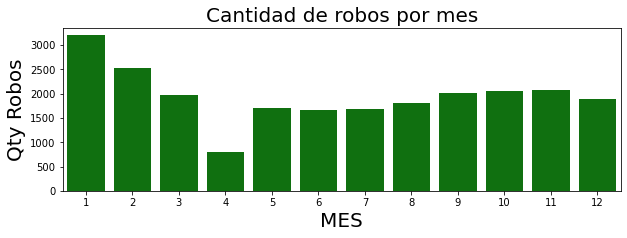

In [28]:
#Primer grafico: visualizamos la cantidad de robos en cada mes del 2020 en todo el país
plt.figure(figsize=(10,3))
sns.countplot(robos_df_total.mes, color="green")
 
plt.xlabel("MES",size = 20)
plt.ylabel("Qty Robos",size = 20)
plt.title('Cantidad de robos por mes',size = 20)
plt.show()

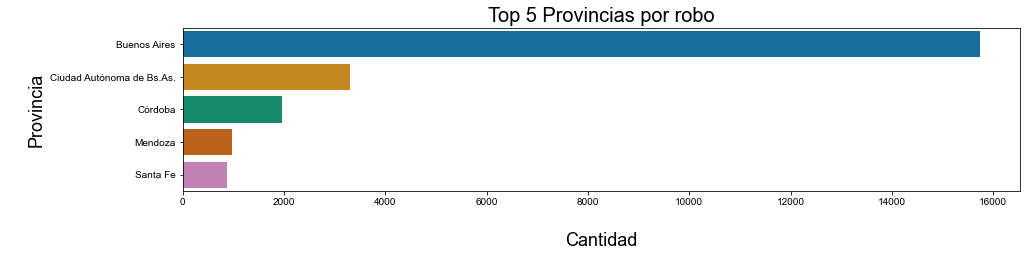

In [29]:
#Visualizamos el top 5 de cantidad de robos por provincia 
# top
top_n = 5
# Guardamos los indices de los top_n categorias
idx_top = robos_df_total['registro_seccional_provincia'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))

g = sns.countplot(y="registro_seccional_provincia", data=robos_df_total,
                  order=idx_top,
                  palette = "colorblind")
g.set_yticklabels(g.get_yticklabels(), rotation=0, ha="right")

plt.title('Top 5 Provincias por robo', size = 20)
sns.set_style("whitegrid")
plt.xlabel("\nCantidad", size = 18)
plt.ylabel("\nProvincia", size = 18)

plt.show()


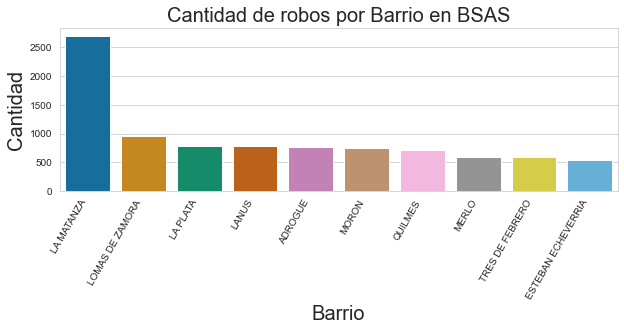

In [30]:
# En este gráfico visualizamos la cantidad de robos por barrio dentro de la provincia de BSAS
#top
top_n = 10

# Guardamos los indices de los top_n categorias
idx_top = robos_df_Buenos_Aires['registro_seccional_descripcion'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(10,3))
# Indicamos la columna 'Category', de los datos 'google_df', en el orden 'idx_top'
g = sns.countplot(x="registro_seccional_descripcion", data=robos_df_Buenos_Aires,
                  order=idx_top,
                  palette = "colorblind")
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right")
plt.title('Cantidad de robos por Barrio en BSAS', size = 20)
plt.xlabel("Barrio", size = 20)
plt.ylabel("Cantidad", size = 20)

plt.show()

In [31]:
# Importamos un nuevo data ser para traer la cantidad de personas por provincia
poblacion_df = pd.read_excel('DATASET.xlsx', sheet_name='Poblacion')

In [32]:
# Realizamos un head para visualizar la información de este nuevo dataset
poblacion_df['valor'] = poblacion_df['valor'].astype(int)
poblacion_df.head()

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
0,99,Indicadores Provinciales,1047,Población,Proyecciones,habitantes,INDEC,Anual,Nacional,PROVINCIA,2,CAPITAL FEDERAL,2020-01-01,3075646
1,99,Indicadores Provinciales,1047,Población,Proyecciones,habitantes,INDEC,Anual,Nacional,PROVINCIA,6,BUENOS AIRES,2020-01-01,17541141
2,99,Indicadores Provinciales,1047,Población,Proyecciones,habitantes,INDEC,Anual,Nacional,PROVINCIA,10,CATAMARCA,2020-01-01,415438
3,99,Indicadores Provinciales,1047,Población,Proyecciones,habitantes,INDEC,Anual,Nacional,PROVINCIA,14,CORDOBA,2020-01-01,3760450
4,99,Indicadores Provinciales,1047,Población,Proyecciones,habitantes,INDEC,Anual,Nacional,PROVINCIA,18,CORRIENTES,2020-01-01,1120801


In [33]:
#Estandarizamos el nombre de las provincias entre los dos datasets
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('CAPITAL FEDERAL','Ciudad Autónoma de Bs.As.')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('BUENOS AIRES','Buenos Aires')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('CATAMARCA','Catamarca')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('CORDOBA','Córdoba')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('CORRIENTES','Corrientes')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('CHACO','Chaco')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('CHUBUT','Chubut')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('ENTRE RIOS','Entre Ríos')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('FORMOSA','Formosa')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('JUJUY','Jujuy')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('LA PAMPA','La Pampa')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('LA RIOJA','La Rioja')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('MENDOZA','Mendoza')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('NEUQUEN','Neuquén')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('RIO NEGRO','Rio Negro')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('SALTA','Salta')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('SAN JUAN','San Juan')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('SAN LUIS','San Luis')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('SANTA CRUZ','Santa Cruz')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('SANTA FE','Santa Fe')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('SANTIAGO DEL ESTERO','Santiago del Estero')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('TUCUMAN','Tucumán')
poblacion_df['alcance_nombre'] = poblacion_df['alcance_nombre'].str.replace('TIERRA DEL FUEGO','Tierra del Fuego')

In [34]:
# Analizamos la cantidad de robos cada 10.000 habitantes para las 5 provincias con mas robos
casos_provincia = robos_df_total['registro_seccional_provincia'].value_counts(ascending=False)

poblacionBSAS = poblacion_df [ poblacion_df['alcance_nombre'] == "Buenos Aires"]
casos_1000_BSAS = (10000*casos_provincia["Buenos Aires"])/(poblacionBSAS["valor"])

poblacionCABA = poblacion_df [ poblacion_df['alcance_nombre'] == "Ciudad Autónoma de Bs.As."]
casos_1000_CABA = (10000*casos_provincia["Ciudad Autónoma de Bs.As."])/(poblacionCABA["valor"])

poblacionMDZ = poblacion_df [ poblacion_df['alcance_nombre'] == "Mendoza"]
casos_1000_MDZ = (10000*casos_provincia["Mendoza"])/(poblacionMDZ["valor"])

poblacionSF = poblacion_df [ poblacion_df['alcance_nombre'] == "Santa Fe"]
casos_1000_SF = (10000*casos_provincia["Santa Fe"])/(poblacionSF["valor"])

poblacionNQ = poblacion_df [ poblacion_df['alcance_nombre'] == "Neuquén"]
casos_1000_NQ = (10000*casos_provincia["Neuquén"])/(poblacionNQ["valor"])

poblacionCOR = poblacion_df [ poblacion_df['alcance_nombre'] == "Córdoba"]
casos_1000_COR = (10000*casos_provincia["Córdoba"])/(poblacionCOR["valor"])

In [35]:
#Armamos un data set visualizando las provincias y la cantidad de robos cada 10.000 habitantes
CasosMil = {"Provincias": ["Buenos Aires","Ciudad Autónoma de Bs.As.","Córdoba","Mendoza","Santa Fe"], "CasosxMil": [casos_1000_BSAS, casos_1000_CABA, casos_1000_COR, casos_1000_MDZ, casos_1000_SF]}
print(CasosMil)
CasosMil_df = pd.DataFrame(CasosMil)

{'Provincias': ['Buenos Aires', 'Ciudad Autónoma de Bs.As.', 'Córdoba', 'Mendoza', 'Santa Fe'], 'CasosxMil': [1    8.96977
Name: valor, dtype: float64, 0    10.719699
Name: valor, dtype: float64, 3    5.18555
Name: valor, dtype: float64, 12    4.858471
Name: valor, dtype: float64, 20    2.465772
Name: valor, dtype: float64]}


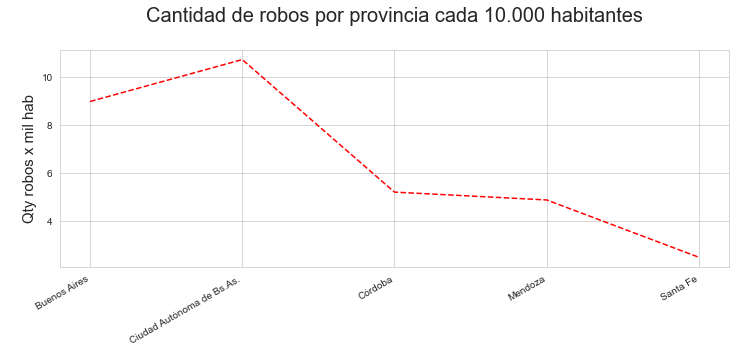

In [36]:
#Armamos un gráfico para visualizar la cantidad de robos cada 10.000 habitantes 

X = CasosMil_df["Provincias"]
Y = CasosMil_df["CasosxMil"]
DF = (robos_df_total['registro_seccional_provincia'].value_counts(ascending=False))
plt.figure(figsize=(12, 4))
plt.plot(X,Y,"r--")

plt.xticks(X, rotation = 30,horizontalalignment = "right")
plt.title("Cantidad de robos por provincia cada 10.000 habitantes\n",size=20)
plt.ylabel("\nQty robos x mil hab",size=15)
plt.show()

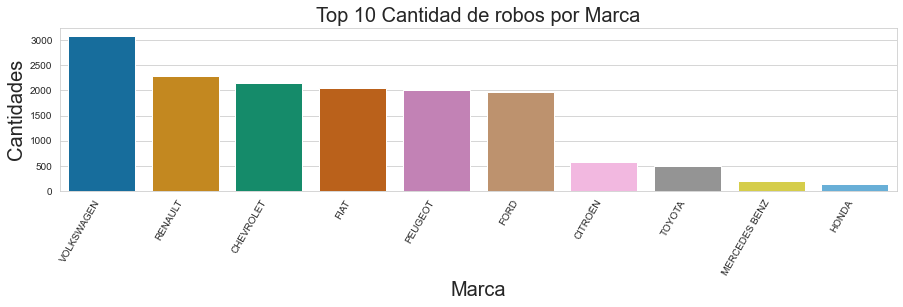

In [37]:
#Armamos un gráfico para poder visualizar el top 10 con la cantidad de robos por marca

# top
top_n = 10
# Guardamos los indices de los top_n categorias
idx_top = robos_df_Buenos_Aires['automotor_marca_descripcion'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))
# Indicamos la columna 'Category', de los datos 'google_df', en el orden 'idx_top'
g = sns.countplot(x="automotor_marca_descripcion", data=robos_df_Buenos_Aires,
                  order=idx_top,
                  palette = "colorblind")
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right")
plt.title('Top 10 Cantidad de robos por Marca', size = 20)
plt.xlabel("Marca", size = 20)
plt.ylabel("Cantidades", size = 20)

plt.show()

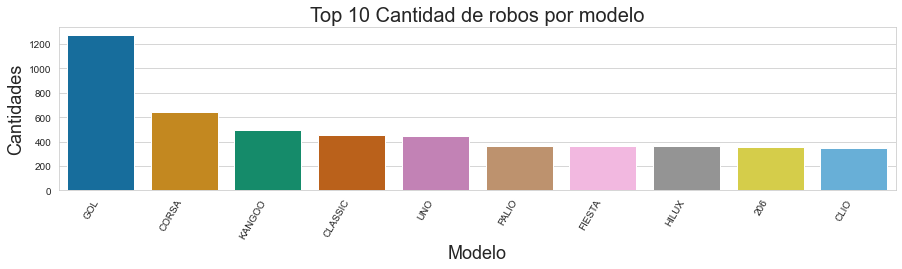

In [38]:
# Top 10 cantidad de robos por modelo
#top
top_n = 10
# Guardamos los indices de los top_n categorias
idx_top = robos_df_Buenos_Aires['automotor_modelo_descripcion'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))
# Indicamos la columna 'Category', de los datos 'google_df', en el orden 'idx_top'
g = sns.countplot(x="automotor_modelo_descripcion", data=robos_df_Buenos_Aires,
                  order=idx_top,
                  palette = "colorblind")
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right")
plt.title('Top 10 Cantidad de robos por modelo', size = 20)
plt.xlabel("Modelo", size = 18)
plt.ylabel("Cantidades", size = 18)

plt.show()

In [39]:
#Empezamos a analizar la información del dataset por género

q_genero = len(robos_df_total['titular_genero'].unique())
print(f'En total hay {q_genero} generos\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", robos_df_Buenos_Aires['titular_genero'].unique())

En total hay 4 generos


 ['Masculino' 'Femenino' 'No identificado' 'No aplica']


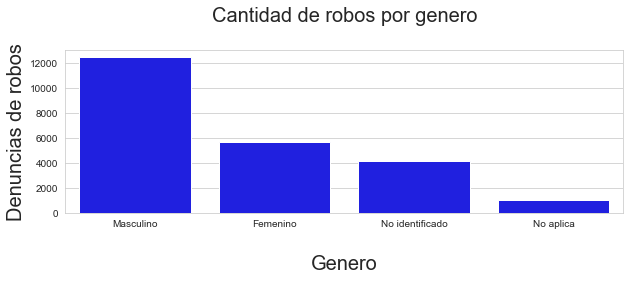

In [40]:
#Visualizamos la cantidad de robos por genero
genero = robos_df_total['titular_genero']
condiciones = [
    (genero == "Masculino"),
    (genero == "Femenino"),
    (genero == "No identificado"),
    (genero == "No aplica"),
]

opciones = ["1","2","3","4"]
robos_df_total["ID_genero"] = np.select(condiciones,opciones)
ID_genero_M = robos_df_total[ robos_df_total["ID_genero"] == 1 ] 
ID_genero_F = robos_df_total[ robos_df_total["ID_genero"] == 2 ] 
ID_genero_NI = robos_df_total[ robos_df_total["ID_genero"] == 3 ]
ID_genero_NA = robos_df_total[ robos_df_total["ID_genero"] == 4 ]


robos_df_total["ID_genero"] = robos_df_total["ID_genero"].astype(int)
id_genero = robos_df_total["ID_genero"]

plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(robos_df_total['titular_genero'], color="blue" )
plt.xlabel("\nGenero",size = 20)
plt.ylabel("Denuncias de robos",size = 20)

plt.title("Cantidad de robos por genero\n",size = 20)
#verlo en porcentaje

plt.show()

In [41]:
#Pasamos a valores enteros la serie "Automotor anio modelo"
robos_df_Buenos_Aires['automotor_anio_modelo'] = robos_df_Buenos_Aires['automotor_anio_modelo'].astype(int)

In [42]:
# Visualizamos la cantidad de años existentes en el dataset
q_anios = len(robos_df_Buenos_Aires['automotor_anio_modelo'].unique())
print(f'En total hay {q_anios} años\r\n')
# Mostramos en la cell los tipos de años
print("\n", robos_df_Buenos_Aires['automotor_anio_modelo'].unique())

En total hay 55 años


 [2000 2019 2016 2011 2010 2017 2018 2015 2012 2005 2007 1998 2014 2008
 1997 2013 2009 2001 1999 1991 1996 1994 1988 1981 1995 2006 2004 1971
 1993 1989 1975 2003 1992 1990 2002 1972 1986 1976 1980 1979 1987 1973
 1982 1969 1974 1977   20 1978 1966 1984 1985 2020 1964 1968 1983]


In [43]:
# Reemplazamos el valor 20 por 1920
robos_df_Buenos_Aires['automotor_anio_modelo'] = robos_df_Buenos_Aires['automotor_anio_modelo'].replace(20,2020)

In [44]:
# Volvemos a visualizar la cantidad de años resultantes
q_anios = len(robos_df_Buenos_Aires['automotor_anio_modelo'].unique())
print(f'En total hay {q_anios} años\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", robos_df_Buenos_Aires['automotor_anio_modelo'].unique())

En total hay 54 años


 [2000 2019 2016 2011 2010 2017 2018 2015 2012 2005 2007 1998 2014 2008
 1997 2013 2009 2001 1999 1991 1996 1994 1988 1981 1995 2006 2004 1971
 1993 1989 1975 2003 1992 1990 2002 1972 1986 1976 1980 1979 1987 1973
 1982 1969 1974 1977 2020 1978 1966 1984 1985 1964 1968 1983]


In [45]:
# Separamos la información de los años en rangos de años
bins = [1964,1990,1996,2002,2008,2012,2016,2020]
names = ["< 90","90-96","96-2002","2002-2008","2008-2012","2012-2016","2016-2020"]
robos_df_Buenos_Aires['automotor_rango_modelo'] = pd.cut(robos_df_Buenos_Aires['automotor_anio_modelo'], bins, labels = names)   

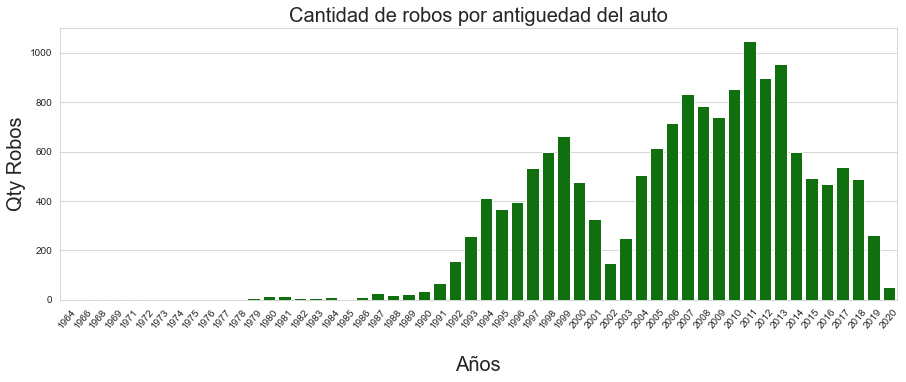

In [46]:
# Armamos un gráfico para visualizar los años del dataset

plt.figure(figsize=(15,5))
h=sns.countplot(robos_df_Buenos_Aires['automotor_anio_modelo'],  color="green")
 
plt.xlabel("\nAños",size = 20)
h.set_xticklabels(h.get_xticklabels(), rotation=50)
plt.ylabel("Qty Robos",size = 20)
plt.title('Cantidad de robos por antiguedad del auto',size = 20)
plt.show()

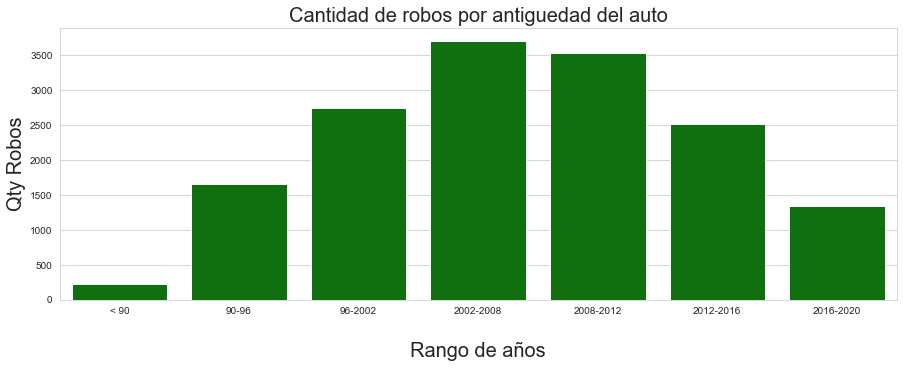

In [47]:
# Visualizamos la información por rango de años
plt.figure(figsize=(15,5))
h=sns.countplot(robos_df_Buenos_Aires['automotor_rango_modelo'],  color="green")
 
plt.xlabel("\nRango de años",size = 20)
h.set_xticklabels(h.get_xticklabels(), rotation=0)
plt.ylabel("Qty Robos",size = 20)
plt.title('Cantidad de robos por antiguedad del auto',size = 20)
plt.show()

In [49]:
# Importamos el mismo dataset con una nueva columna indicando el precio del auto
Autos_total_df = pd.read_excel('DF6.xlsx')

In [50]:
Autos_total_df.head()

,Unnamed: 0,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,...,automotor_modelo_codigo,automotor_modelo_descripcion,Precio_nominal,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_domicilio_provincia_id,mes,automotor_rango_modelo
0,77,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-16,2017-11-23,1003,ARRECIFES,Buenos Aires,Protocolo 21,2017,92,...,566,17,8000000.0,ESTACION TODD,BUENOS AIRES,No aplica,2011,6,1,2016-2020
1,18794,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-10-30,2020-06-23,1152,LA MATANZA,Buenos Aires,Nacional,2020,22,...,NS,PARTNER,1900000.0,CIUDAD EVITA,BUENOS AIRES,Masculino,2001,6,10,2016-2020
2,20902,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-11-02,2020-09-14,1152,LA MATANZA,Buenos Aires,Protocolo 21,2020,5,...,670,GOL,1750000.0,ISIDRO CASANOVA,BUENOS AIRES,Masculino,1985,6,11,2016-2020
3,1423,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-22,2019-11-19,1218,MORON,Buenos Aires,Protocolo 21,2019,5,...,A84,KA,1800000.0,CASTELAR,BUENOS AIRES,Masculino,1969,6,1,2016-2020
4,1115,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-14,2000-05-04,1178,LA MATANZA,Buenos Aires,Nacional,2020,0,...,EF,KANGOO,2200000.0,RAFAEL CASTILLO,BUENOS AIRES,Masculino,1970,6,1,2016-2020


In [51]:
Autos_total_df.drop(["Unnamed: 0"], axis=1,inplace=True)

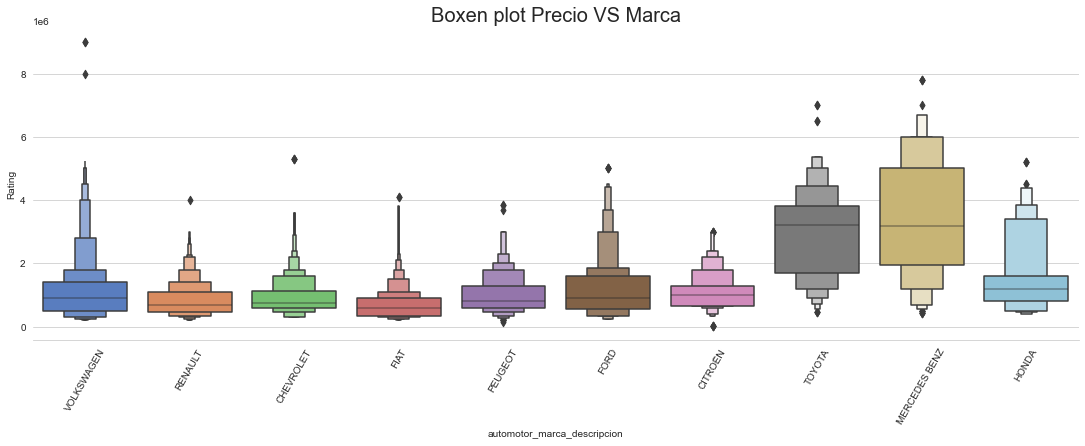

In [53]:
# top
top_n = 10
# Guardamos los indices de los top_n categorias
idx_top = Autos_total_df['automotor_marca_descripcion'].value_counts(ascending=False).index[0:top_n]

g = sns.catplot(x=Autos_total_df['automotor_marca_descripcion'],y=Autos_total_df["Precio_nominal"], 
                data=Autos_total_df, 
                order=idx_top,
                kind="boxen", # box , violin
                height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=60)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Precio VS Marca',size = 20)
plt.show()

In [54]:
cat_cols = ['automotor_marca_descripcion', 'registro_seccional_descripcion',"titular_genero","automotor_rango_modelo"]

for col in cat_cols:
  Autos_total_df.loc[:, col] = pd.Categorical(Autos_total_df[col]).codes

In [55]:
Autos_total_df.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_modelo_codigo,automotor_modelo_descripcion,Precio_nominal,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_domicilio_provincia_id,mes,automotor_rango_modelo
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-16,2017-11-23,1003,4,Buenos Aires,Protocolo 21,2017,92,TRACTOR C/CABINA DORMITORIO,...,566,17,8000000.0,ESTACION TODD,BUENOS AIRES,2,2011,6,1,3
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-10-30,2020-06-23,1152,45,Buenos Aires,Nacional,2020,22,FURGON,...,NS,PARTNER,1900000.0,CIUDAD EVITA,BUENOS AIRES,1,2001,6,10,3
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-11-02,2020-09-14,1152,45,Buenos Aires,Protocolo 21,2020,5,SEDAN 5 PUERTAS,...,670,GOL,1750000.0,ISIDRO CASANOVA,BUENOS AIRES,1,1985,6,11,3
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-22,2019-11-19,1218,64,Buenos Aires,Protocolo 21,2019,5,SEDAN 5 PUERTAS,...,A84,KA,1800000.0,CASTELAR,BUENOS AIRES,1,1969,6,1,3
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-14,2000-05-04,1178,45,Buenos Aires,Nacional,2020,0,SIN ESPECIFICACION,...,EF,KANGOO,2200000.0,RAFAEL CASTILLO,BUENOS AIRES,1,1970,6,1,3


In [56]:
#Eliminamos mas columnas que no aplican al modelo de machine learning a aplicar
Autos_total_df.drop(["fecha_inscripcion_inicial", "registro_seccional_codigo","automotor_origen","automotor_tipo_codigo","automotor_tipo_descripcion","automotor_modelo_codigo"], axis=1,inplace=True)
Autos_total_df.drop(["tramite_fecha","registro_seccional_provincia","titular_domicilio_provincia","titular_domicilio_localidad","automotor_marca_codigo",], axis=1,inplace=True)
Autos_total_df.drop(["titular_domicilio_provincia_id","automotor_rango_modelo","automotor_modelo_descripcion"], axis=1,inplace=True)

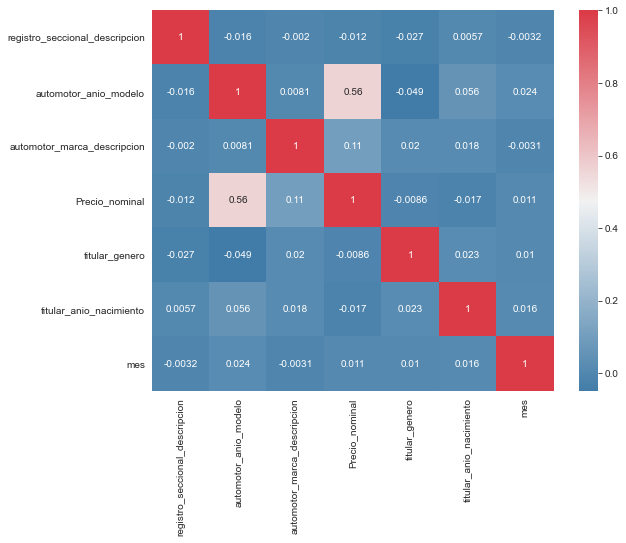

In [57]:
corrmat = Autos_total_df.corr()

f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [58]:
#Eliminamos columnas innecesarias para nuestro modelo de aprendizaje no supersivado
Autos_total_df.drop(["titular_anio_nacimiento"], axis=1,inplace=True)
Autos_total_df.drop(["mes"], axis=1,inplace=True)
Autos_total_df.drop(["automotor_marca_descripcion"], axis=1,inplace=True)


In [59]:
#Visualizamos la cantidad de nulos que tenemos
total = Autos_total_df.isnull().sum().sort_values(ascending=False)
percent = (Autos_total_df.isnull().sum()/Autos_total_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(1)

,Total,Percent
Precio_nominal,464,0.029485


In [60]:
# Eliminamos los valores nulos
Autos_total_df.dropna(how ='any', inplace = True)

In [61]:
#Pasamos a valores enteros la serie "Precio nominal"
Autos_total_df['Precio_nominal'] = Autos_total_df['Precio_nominal'].astype(int)

In [62]:
#Vemos la cantida de datos que quedaron en el dataset
Autos_total_df.shape

(15273, 5)

In [63]:
Autos_total_df['tramite_tipo'] = Autos_total_df['tramite_tipo'].replace('COMUNICACIÓN DE RECUPERO',np.nan)


In [64]:
total = Autos_total_df.isnull().sum().sort_values(ascending=False)
percent = (Autos_total_df.isnull().sum()/Autos_total_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
tramite_tipo,340,0.022262
registro_seccional_descripcion,0,0.000000
automotor_anio_modelo,0,0.000000
Precio_nominal,0,0.000000
titular_genero,0,0.000000


In [65]:
Autos_total_df.dropna(how ='any', inplace = True)

In [66]:
##Vemos la cantida de datos que quedaron en el dataset luego de haber eliminado los autos que fueron recuperados
Autos_total_df.shape

(14933, 5)

In [67]:
x = Autos_total_df.iloc[:,1:]
x.head()

,registro_seccional_descripcion,automotor_anio_modelo,Precio_nominal,titular_genero
0,4,2017,8000000,2
1,45,2020,1900000,1
2,45,2020,1750000,1
3,64,2019,1800000,1
4,45,2020,2200000,1
